# SMS Spam Classifier

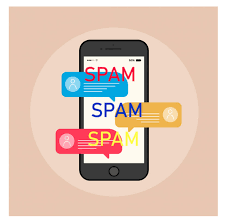

# Import libraries

In [ ]:
import nltk
import re
import string
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# unzip the data

# !unzip /content/drive/MyDrive/NLP/smsspamcollection.zip -d /content/drive/MyDrive/NLP

Archive:  /content/drive/MyDrive/NLP/smsspamcollection.zip
  inflating: /content/drive/MyDrive/NLP/SMSSpamCollection  
  inflating: /content/drive/MyDrive/NLP/readme  


# Read the data set

In [ ]:
# read  the data

message=pd.read_csv('/content/drive/MyDrive/NLP/SMSSpamCollection', sep='\t',names=['label','message'])

message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data cleaning & Data processing


- Remove punctuation
- Lower the text
- Remove stopwords
- lemmatize the words
- convert text into vectors using different different techniques like Bag of words , TF-IDF

In [ ]:
# see the complete text
pd.set_option('display.max_colwidth',None)
message['message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
# creating the object for lemmatizer

lemmatizer=WordNetLemmatizer()

In [ ]:
# creating empty list
new_message=[]

# run afor loop to iterate message column
for i in range(len(message)):
  # remove the stopwords
  review= re.sub('[^a-zA-Z]',' ', message['message'][i])
  # lower the text
  review= review.lower()

  # split the text into loist of words
  review=nltk.word_tokenize(review)

  # lemmatize words to covert into base form
  lemmatized= [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]

  # append the lemmatize words after joining into sentences
  new_message.append(' '.join(lemmatized))



## Convert text into vectors
- Using Bag of Words technique

In [ ]:
# convert text into vectors

from sklearn.feature_extraction.text import  CountVectorizer

cv=CountVectorizer(max_features=5000)

X=cv.fit_transform(new_message).toarray()

In [ ]:
# convert the label column into numerical values

y=pd.get_dummies(message['label'])
y=y.iloc[:,1]

In [ ]:
# split the data into train and test data set
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.25,random_state=1)

In [ ]:
X_train.shape, X_test.shape

((4179, 5000), (1393, 5000))

# Build the model

In [ ]:
# Build the model

from sklearn.naive_bayes import MultinomialNB

naive=MultinomialNB()

naive.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# predict the output
y_pred=naive.predict(X_test)

# Evaluate the model

In [ ]:
# Evaluation metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, y_pred)

0.9820531227566404

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1192,   16],
       [   9,  176]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1208
           1       0.92      0.95      0.93       185

    accuracy                           0.98      1393
   macro avg       0.95      0.97      0.96      1393
weighted avg       0.98      0.98      0.98      1393

